In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix

df = pd.read_csv('breast-cancer.csv')
print(df.columns)

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')


In [9]:
df.drop(columns=['id', 'Unnamed: 32'], inplace=True, errors='ignore')


In [12]:
# Encode diagnosis: M = 1 (Malignant), B = 0 (Benign)
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})


In [10]:
# Check for missing values
print(df.isnull().sum().sum())

0


In [11]:
print(df.isnull().sum())

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64


In [13]:
print(df['diagnosis'].head())

0    1
1    1
2    1
3    1
4    1
Name: diagnosis, dtype: int64


In [14]:
# Separate features and target
X = df.drop(columns=['diagnosis'])
y = df['diagnosis']

In [15]:
# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [16]:
# Train-Test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

In [17]:
# Train model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [18]:
# Predict
y_pred = model.predict(X_test)

In [19]:
# Metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9736842105263158
F1 Score: 0.962962962962963

Classification Report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98        72
           1       1.00      0.93      0.96        42

    accuracy                           0.97       114
   macro avg       0.98      0.96      0.97       114
weighted avg       0.97      0.97      0.97       114



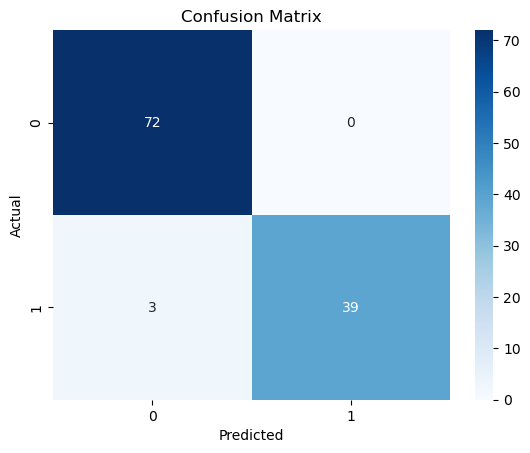

In [20]:
# Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

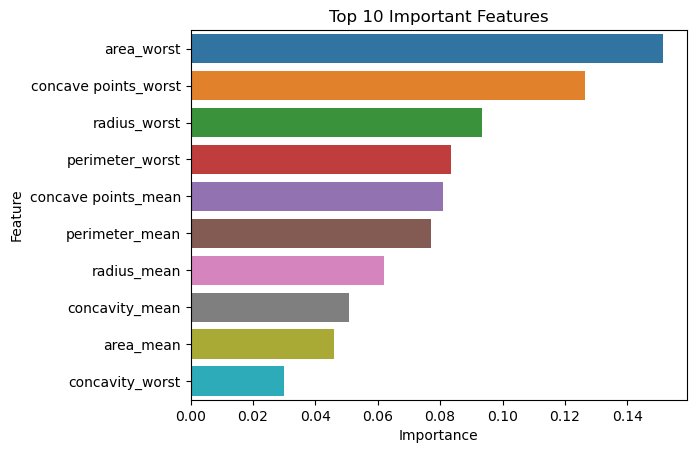

In [21]:
importances = model.feature_importances_
feature_names = df.drop(columns=['diagnosis']).columns

# Plot
feat_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feat_df.sort_values(by='Importance', ascending=False, inplace=True)

sns.barplot(x='Importance', y='Feature', data=feat_df.head(10))
plt.title("Top 10 Important Features")
plt.show()

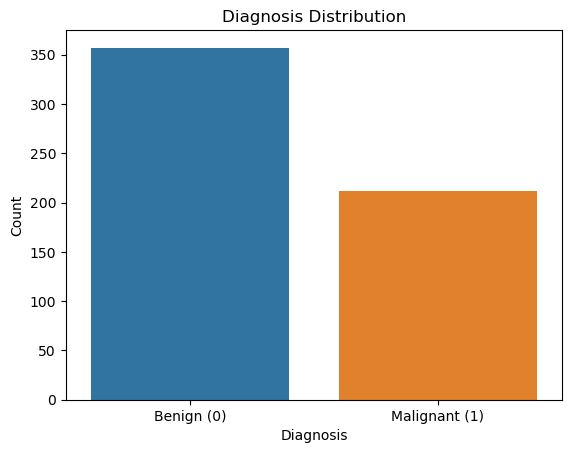

In [22]:
# Bar chart of diagnosis counts
sns.countplot(x='diagnosis', data=df)
plt.title('Diagnosis Distribution')
plt.xticks([0, 1], ['Benign (0)', 'Malignant (1)'])
plt.xlabel('Diagnosis')
plt.ylabel('Count')
plt.show()

In [26]:
corr = df.drop(columns=['id'], errors='ignore').corr()

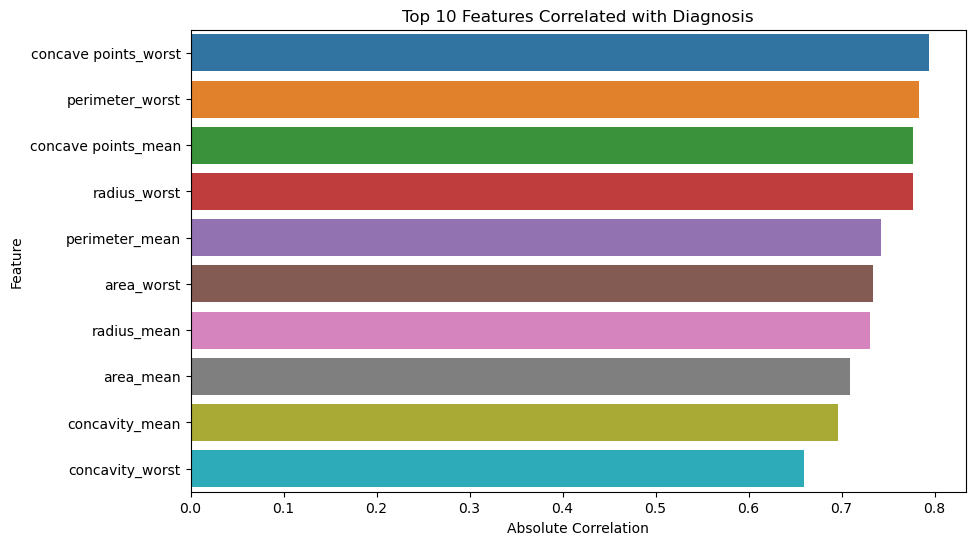

In [27]:
cor_target = corr['diagnosis'].drop('diagnosis').abs().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x=cor_target.values[:10], y=cor_target.index[:10])
plt.title('Top 10 Features Correlated with Diagnosis')
plt.xlabel('Absolute Correlation')
plt.ylabel('Feature')
plt.show()

/opt/conda/envs/anaconda-panel-2023.05-py310/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


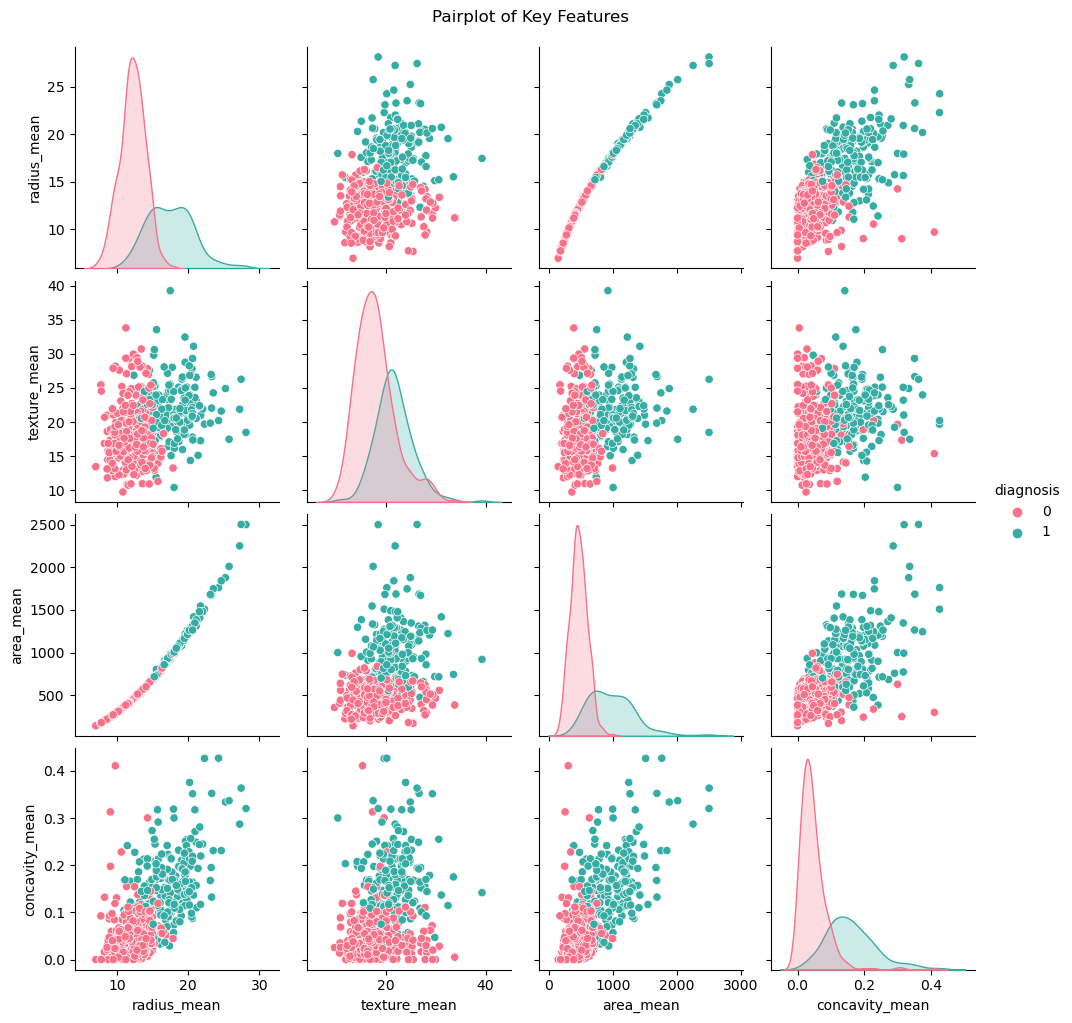

In [28]:
sns.pairplot(df[['diagnosis', 'radius_mean', 'texture_mean', 'area_mean', 'concavity_mean']],
             hue='diagnosis', palette='husl')
plt.suptitle("Pairplot of Key Features", y=1.02)
plt.show()

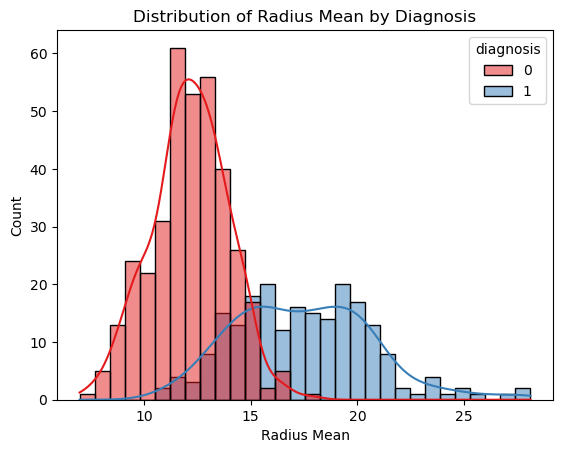

In [29]:
sns.histplot(data=df, x='radius_mean', hue='diagnosis', kde=True, palette='Set1', bins=30)
plt.title('Distribution of Radius Mean by Diagnosis')
plt.xlabel('Radius Mean')
plt.ylabel('Count')
plt.show()